### Importing necessary libraries

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the datasets

In [276]:
expedition_data = pd.read_csv("datasets/EXPEDITION_DATA.csv", encoding='cp1252')
peaks_data = pd.read_csv("datasets/PEAKS_DATA.csv")

### Inspecting the datasets

In [277]:
expedition_data.head()

,EXPID,PEAKID,YEAR,SEASON,SEASON_FACTOR,HOST,HOST_FACTOR,ROUTE1,ROUTE2,ROUTE3,...,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,EVER20101,EVER,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,NaN,NaN,Holy Mountain Adventure,True,True,False,False,False,NaN,2465291
1,EVER20102,EVER,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,NaN,NaN,NaN,True,True,False,False,False,NaN,2465292
2,EVER20103,EVER,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,NaN,NaN,Holy Mountain Adventure,True,True,False,False,False,NaN,2465293
3,AMAD20301,AMAD,2020,3,Autumn,1,Nepal,SW Ridge,NaN,NaN,...,NaN,NaN,Seven Summit Treks,True,False,False,False,False,NaN,2463299
4,AMAD20302,AMAD,2020,3,Autumn,1,Nepal,SW Ridge,NaN,NaN,...,NaN,NaN,Himalayan Guides,True,False,False,False,False,NaN,2463299


In [278]:
peaks_data.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,HIMAL_FACTOR,REGION,REGION_FACTOR,...,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,Khumbu,2,Khumbu-Rolwaling-Makalu,...,8.0,1961.0,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,13.0
1,AMPG,Amphu Gyabjen,Amphu Gyabien,Khumbu Himal (N of Ama Dablam),5630,18471,12,Khumbu,2,Khumbu-Rolwaling-Makalu,...,20.0,1953.0,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,Annapurna,5,Annapurna-Damodar-Peri,...,23.0,1950.0,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,25.0,26.0
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,Annapurna,5,Annapurna-Damodar-Peri,...,31.0,1960.0,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,33.0,34.0
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,Annapurna,5,Annapurna-Damodar-Peri,...,35.0,1961.0,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,37.0


In [279]:
expedition_data.shape, peaks_data.shape

((882, 69), (480, 29))

In [280]:
peaks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PEAKID          480 non-null    object 
 1   PKNAME          480 non-null    object 
 2   PKNAME2         257 non-null    object 
 3   LOCATION        479 non-null    object 
 4   HEIGHTM         480 non-null    int64  
 5   HEIGHTF         480 non-null    int64  
 6   HIMAL           480 non-null    int64  
 7   HIMAL_FACTOR    480 non-null    object 
 8   REGION          480 non-null    int64  
 9   REGION_FACTOR   480 non-null    object 
 10  OPEN            480 non-null    bool   
 11  UNLISTED        480 non-null    bool   
 12  TREKKING        480 non-null    bool   
 13  TREKYEAR        29 non-null     float64
 14  RESTRICT        275 non-null    object 
 15  PHOST           480 non-null    int64  
 16  PHOST_FACTOR    480 non-null    object 
 17  PSTATUS         480 non-null    int

In [281]:
expedition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EXPID              882 non-null    object 
 1   PEAKID             882 non-null    object 
 2   YEAR               882 non-null    int64  
 3   SEASON             882 non-null    int64  
 4   SEASON_FACTOR      882 non-null    object 
 5   HOST               882 non-null    int64  
 6   HOST_FACTOR        882 non-null    object 
 7   ROUTE1             862 non-null    object 
 8   ROUTE2             43 non-null     object 
 9   ROUTE3             0 non-null      float64
 10  ROUTE4             0 non-null      float64
 11  NATION             882 non-null    object 
 12  LEADERS            882 non-null    object 
 13  SPONSOR            882 non-null    object 
 14  SUCCESS1           882 non-null    bool   
 15  SUCCESS2           882 non-null    bool   
 16  SUCCESS3           882 non

### Merging the two datasets using inner join

In [282]:
merged_data = pd.merge(left=expedition_data, right=peaks_data, how='inner', on='PEAKID')

merged_data.shape, merged_data.columns

((882, 97),
 Index(['EXPID', 'PEAKID', 'YEAR', 'SEASON', 'SEASON_FACTOR', 'HOST',
        'HOST_FACTOR', 'ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4', 'NATION',
        'LEADERS', 'SPONSOR', 'SUCCESS1', 'SUCCESS2', 'SUCCESS3', 'SUCCESS4',
        'ASCENT1', 'ASCENT2', 'ASCENT3', 'ASCENT4', 'CLAIMED', 'DISPUTED',
        'COUNTRIES', 'APPROACH', 'BCDATE', 'SMTDATE', 'SMTTIME', 'SMTDAYS',
        'TOTDAYS', 'TERMDATE', 'TERMREASON', 'TERMREASON_FACTOR', 'TERMNOTE',
        'HIGHPOINT', 'TRAVERSE', 'SKI', 'PARAPENTE', 'CAMPS', 'ROPE',
        'TOTMEMBERS', 'SMTMEMBERS', 'MDEATHS', 'TOTHIRED', 'SMTHIRED',
        'HDEATHS', 'NOHIRED', 'O2USED', 'O2NONE', 'O2CLIMB', 'O2DESCENT',
        'O2SLEEP', 'O2MEDICAL', 'O2TAKEN', 'O2UNKWN', 'OTHERSMTS', 'CAMPSITES',
        'ROUTEMEMO', 'ACCIDENTS', 'ACHIEVMENT', 'AGENCY', 'COMRTE', 'STDRTE',
        'PRIMRTE', 'PRIMMEM', 'PRIMREF', 'PRIMID', 'CHKSUM', 'PKNAME',
        'PKNAME2', 'LOCATION', 'HEIGHTM', 'HEIGHTF', 'HIMAL', 'HIMAL_FACTOR',
        'REGION'

### Filtering out useless columns/features

In [283]:
#df is the final dataframe to be analyzed
df = merged_data[['PEAKID', 'EXPID', 'YEAR', 'SEASON', 'SEASON_FACTOR', 'HOST', 'HOST_FACTOR',
                  'ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4', 'TOTMEMBERS', 'SUCCESS1', 'SUCCESS2',
                  'SUCCESS3', 'SUCCESS4', 'TERMREASON_FACTOR', 'O2USED', 'O2NONE', 'NOHIRED',
                  'MDEATHS', 'HDEATHS', 'PKNAME', 'PKNAME2', 'HEIGHTM', 'HEIGHTF', 'HIMAL_FACTOR',
                  'REGION_FACTOR', 'OPEN', 'PYEAR', 'PSTATUS_FACTOR', 'PSMTDATE']]

In [284]:
df.head()

,PEAKID,EXPID,YEAR,SEASON,SEASON_FACTOR,HOST,HOST_FACTOR,ROUTE1,ROUTE2,ROUTE3,...,PKNAME,PKNAME2,HEIGHTM,HEIGHTF,HIMAL_FACTOR,REGION_FACTOR,OPEN,PYEAR,PSTATUS_FACTOR,PSMTDATE
0,EVER,EVER20101,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,Everest,"Sagarmatha, Chomolungma, Qomolungma",8849,29032,Khumbu,Khumbu-Rolwaling-Makalu,True,1953.0,Climbed,May 29
1,EVER,EVER20102,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,Everest,"Sagarmatha, Chomolungma, Qomolungma",8849,29032,Khumbu,Khumbu-Rolwaling-Makalu,True,1953.0,Climbed,May 29
2,EVER,EVER20103,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,Everest,"Sagarmatha, Chomolungma, Qomolungma",8849,29032,Khumbu,Khumbu-Rolwaling-Makalu,True,1953.0,Climbed,May 29
3,AMAD,AMAD20301,2020,3,Autumn,1,Nepal,SW Ridge,NaN,NaN,...,Ama Dablam,Amai Dablang,6814,22356,Khumbu,Khumbu-Rolwaling-Makalu,True,1961.0,Climbed,Mar 13
4,AMAD,AMAD20302,2020,3,Autumn,1,Nepal,SW Ridge,NaN,NaN,...,Ama Dablam,Amai Dablang,6814,22356,Khumbu,Khumbu-Rolwaling-Makalu,True,1961.0,Climbed,Mar 13


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PEAKID             882 non-null    object 
 1   EXPID              882 non-null    object 
 2   YEAR               882 non-null    int64  
 3   SEASON             882 non-null    int64  
 4   SEASON_FACTOR      882 non-null    object 
 5   HOST               882 non-null    int64  
 6   HOST_FACTOR        882 non-null    object 
 7   ROUTE1             862 non-null    object 
 8   ROUTE2             43 non-null     object 
 9   ROUTE3             0 non-null      float64
 10  ROUTE4             0 non-null      float64
 11  TOTMEMBERS         882 non-null    int64  
 12  SUCCESS1           882 non-null    bool   
 13  SUCCESS2           882 non-null    bool   
 14  SUCCESS3           882 non-null    bool   
 15  SUCCESS4           882 non-null    bool   
 16  TERMREASON_FACTOR  882 non

In [286]:
df.isnull().sum()

PEAKID                 0
EXPID                  0
YEAR                   0
SEASON                 0
SEASON_FACTOR          0
HOST                   0
HOST_FACTOR            0
ROUTE1                20
ROUTE2               839
ROUTE3               882
ROUTE4               882
TOTMEMBERS             0
SUCCESS1               0
SUCCESS2               0
SUCCESS3               0
SUCCESS4               0
TERMREASON_FACTOR      0
O2USED                 0
O2NONE                 0
NOHIRED                0
MDEATHS                0
HDEATHS                0
PKNAME                 0
PKNAME2              351
HEIGHTM                0
HEIGHTF                0
HIMAL_FACTOR           0
REGION_FACTOR          0
OPEN                   0
PYEAR                 21
PSTATUS_FACTOR         0
PSMTDATE              21
dtype: int64

### Analyzing the dataframe to gather insights

### **1. Finding how expedition count has changed over the years**

In [287]:
df['YEAR'].unique()

array([2020, 2021, 2022, 2023, 2024])

In [288]:
year_counts = df.groupby('YEAR')['TOTMEMBERS'].sum()

(array([2019.5, 2020. , 2020.5, 2021. , 2021.5, 2022. , 2022.5, 2023. ,
        2023.5, 2024. , 2024.5]),
 [Text(2019.5, 0, '2019.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2020.5, 0, '2020.5'),
  Text(2021.0, 0, '2021.0'),
  Text(2021.5, 0, '2021.5'),
  Text(2022.0, 0, '2022.0'),
  Text(2022.5, 0, '2022.5'),
  Text(2023.0, 0, '2023.0'),
  Text(2023.5, 0, '2023.5'),
  Text(2024.0, 0, '2024.0'),
  Text(2024.5, 0, '2024.5')])

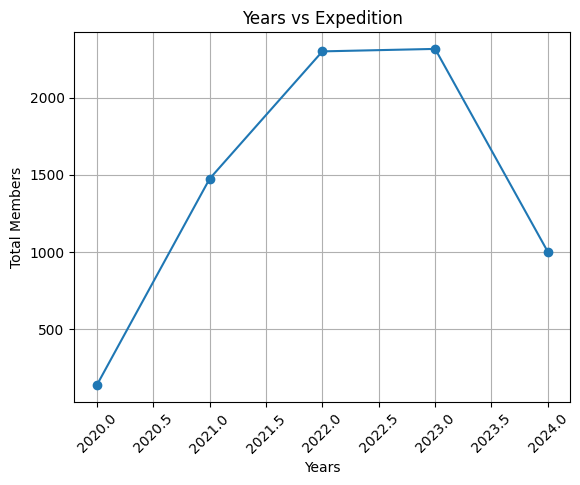

In [289]:
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Years')
plt.ylabel('Total Members')
plt.title('Years vs Expedition')
plt.grid()
plt.xticks(rotation=45)

It can be seen that the expedition peaked during 2022 and 2023.

### **2. Popular seasons for expeditions**

In [290]:
seasons = df.groupby('SEASON_FACTOR')['TOTMEMBERS'].sum()
seasons

SEASON_FACTOR
Autumn    3334
Spring    3787
Summer      11
Winter      94
Name: TOTMEMBERS, dtype: int64

Text(0.5, 1.0, 'Seasons vs Expedition')

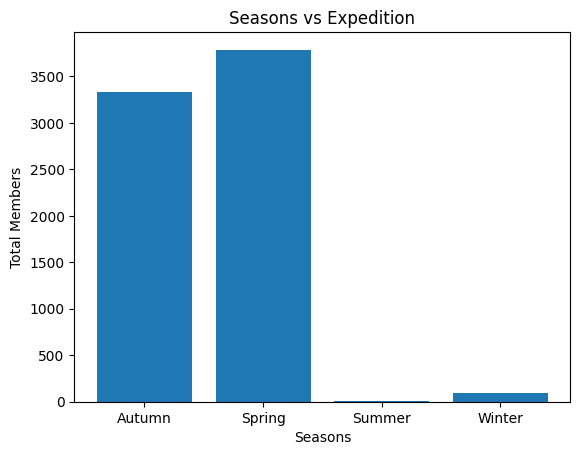

In [291]:
plt.bar(seasons.index, seasons.values)
plt.xlabel('Seasons')
plt.ylabel('Total Members')
plt.title('Seasons vs Expedition')

Tourists like to travel during autumn and spring.

### **3. Finding which country has the most expedition**

In [292]:
host_countries = df.groupby(by='HOST_FACTOR')['TOTMEMBERS'].sum()

Text(0.5, 1.0, 'Host Countries vs Expedition Horizontal')

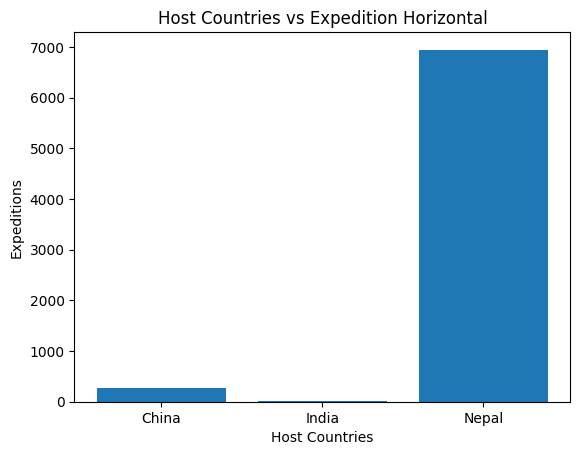

In [293]:
plt.bar(host_countries.index, host_countries.values)
plt.xlabel('Host Countries')
plt.ylabel('Expeditions')
plt.title('Host Countries vs Expedition Horizontal')

Nepal dominates in this category.

### **4. Finding Highest average mountain range** 

In [294]:
df['PKNAME'].duplicated().sum()

np.int64(766)

In [295]:
highest_average_range = df.groupby('HIMAL_FACTOR')['HEIGHTM'].mean().sort_values(ascending=False)

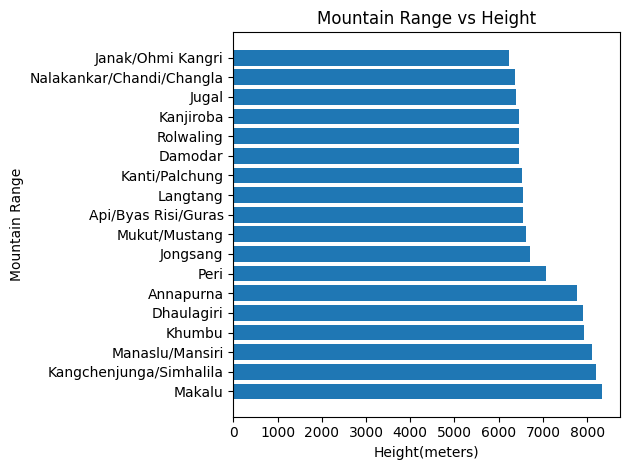

In [296]:
plt.barh(highest_average_range.index, highest_average_range.values)
plt.ylabel('Mountain Range')
plt.xlabel('Height(meters)')
plt.title('Mountain Range vs Height')
plt.tight_layout()

In [297]:
highest_average_range_name = df.groupby('HIMAL_FACTOR')['HEIGHTM'].mean().sort_values(ascending=False).idxmax()
highest_average_range_height = df.groupby('HIMAL_FACTOR')['HEIGHTM'].mean().max()

print(f'{highest_average_range_name} has the highest average peak height of {highest_average_range_height} meters.')

Makalu has the highest average peak height of 8326.827586206897 meters.


### **5. Climbing statuses across different mountain range**

In [298]:
climbing_status = df.groupby('HIMAL_FACTOR')['PSTATUS_FACTOR'].value_counts().unstack()

Text(0.5, 1.0, 'Distribution of climbing statuses across different mountain ranges')

<Figure size 1500x1200 with 0 Axes>

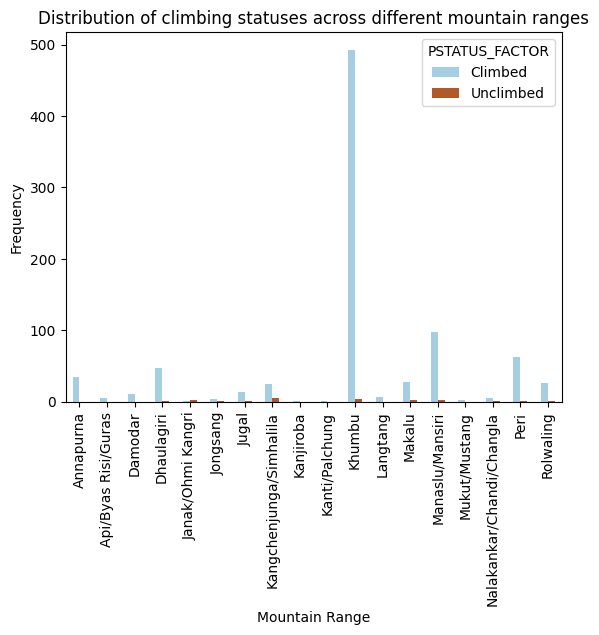

In [299]:
plt.figure(figsize=(15, 12))
climbing_status.plot(kind='bar', colormap='Paired', stacked=False)
plt.xlabel('Mountain Range')
plt.ylabel('Frequency')
plt.title('Distribution of climbing statuses across different mountain ranges')

It can be seen that there is little to no unclimbed peaks at all.

### **6. Climbing routes with most success rate**

In [300]:
success_columns = ['SUCCESS1', 'SUCCESS2', 'SUCCESS3', 'SUCCESS4']
routes = ['Route 1', 'Route 2', 'Route 3', 'Route 4']

success_numbers = df[success_columns].sum().tolist()

Text(0.5, 1.0, 'Climbing routes with most successes')

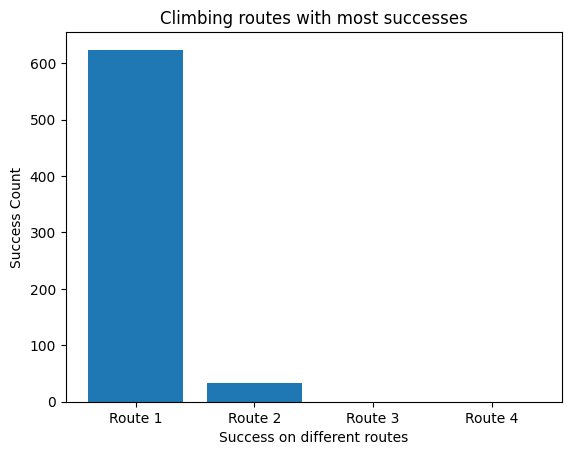

In [301]:
plt.bar(routes, success_numbers)
plt.xlabel('Success on different routes')
plt.ylabel('Success Count')
plt.title('Climbing routes with most successes')

In [302]:
success_rates_by_route = (df[success_columns].sum()/df[success_columns].value_counts().sum()).to_numpy() * 100
success_rates_by_route

array([70.74829932,  3.85487528,  0.        ,  0.        ])

Text(0.5, 1.0, 'Success Rates on different Routes')

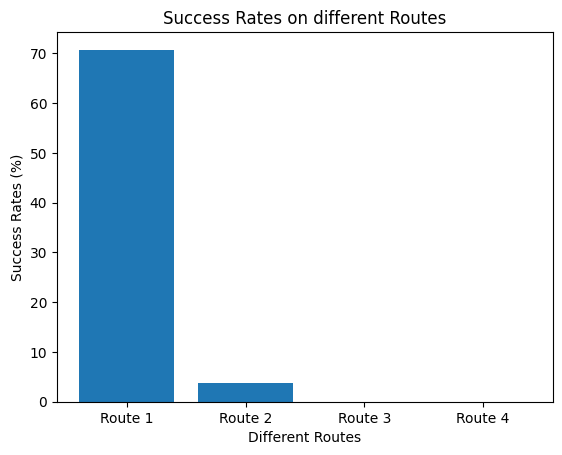

In [303]:
plt.bar(routes, success_rates_by_route)
plt.xlabel('Different Routes')
plt.ylabel('Success Rates (%)')
plt.title('Success Rates on different Routes')

It is surprising how only Route 1 has great success.

### **7. Common reason for termination**

In [342]:
termination_reason = df[df['TERMREASON_FACTOR'] != 'Success (main peak)']['TERMREASON_FACTOR'].value_counts()

<BarContainer object of 12 artists>

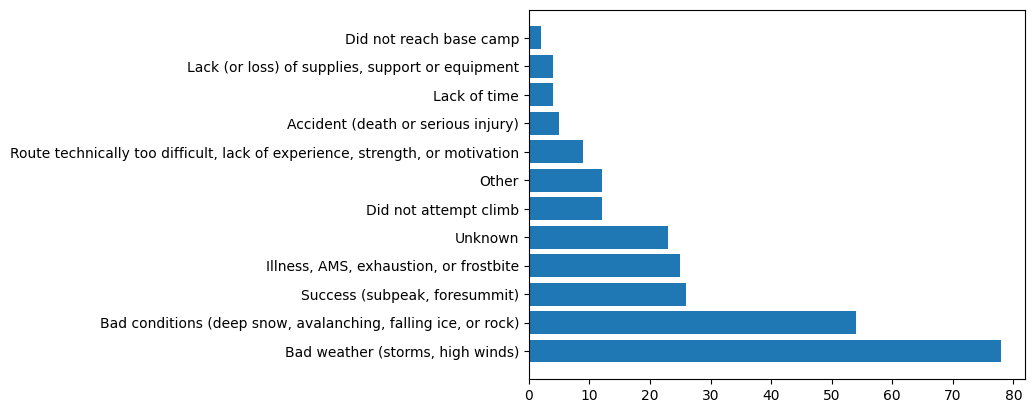

In [343]:
plt.barh(termination_reason.index, termination_reason.values)

It can be seen that the most common termination reason was due to Bad weather.

### **8. Impact of Hired Personnel on Death**

In [305]:
grouped = df.groupby('NOHIRED')[['MDEATHS', 'HDEATHS']].sum()


Text(0.5, 1.0, 'Deaths when a personnel were hired')

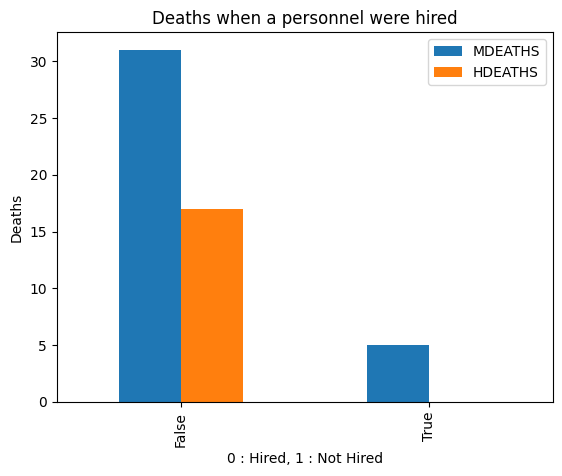

In [306]:
grouped.plot(kind='bar')
plt.xlabel('0 : Hired, 1 : Not Hired')
plt.ylabel('Deaths')
plt.title('Deaths when a personnel were hired')

It can be seen that there are surprisingly more deaths when a personnel was hired.

In [307]:
total_deaths_for_hired_and_notHired = grouped.values.sum(axis=1)
total_deaths = grouped.values.sum()

death_rate = total_deaths_for_hired_and_notHired/total_deaths

Text(0.5, 1.0, 'Death Rate when personnel were hired')

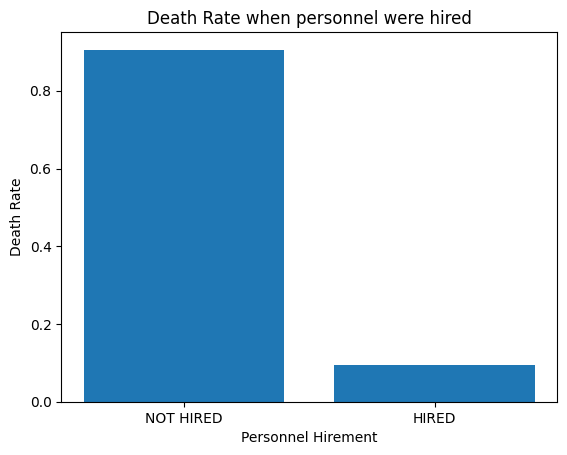

In [308]:
plt.bar(['NOT HIRED', 'HIRED'], death_rate)
plt.xlabel('Personnel Hirement')
plt.ylabel('Death Rate')
plt.title('Death Rate when personnel were hired')

### **9. Regions with most unclimbed peaks**

In [309]:
unclimbed_peaks = df[df['PSTATUS_FACTOR'] == 'Unclimbed']
region_unclimbed_counts = unclimbed_peaks['REGION_FACTOR'].value_counts()

Text(0.5, 1.0, 'Regions with Most Unclimbed Peaks')

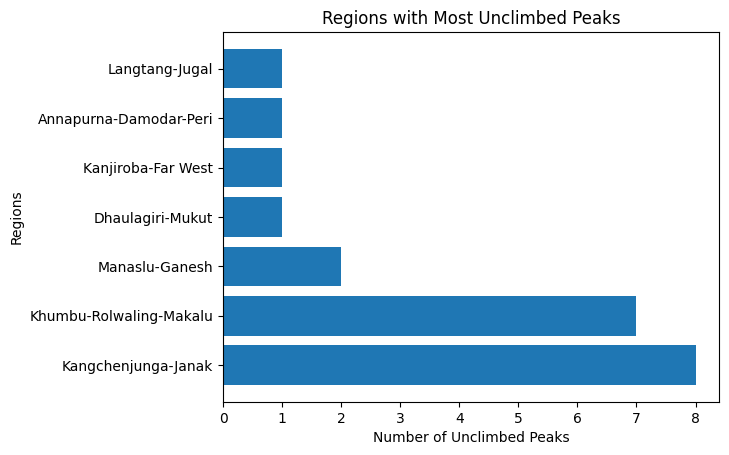

In [310]:
plt.barh(region_unclimbed_counts.index, region_unclimbed_counts.values)
plt.ylabel('Regions')
plt.xlabel('Number of Unclimbed Peaks')
plt.title('Regions with Most Unclimbed Peaks')

Kangchenjunga-janak has the most number of unclimbed peaks(8).

### **10. Impact of Oxygen used**

In [323]:
#considering only SUCCESS1 and SUCCESS2 as other routes don't have any successes
df.loc[:,'SUCCESS'] = df['SUCCESS1'].astype(bool) | df['SUCCESS2'].astype(bool)

In [ ]:
oxygen_success = df.groupby('O2USED')[['SUCCESS']].mean()

,SUCCESS
O2USED,
False,0.556025
True,0.892421


Text(0.5, 1.0, 'Success Rate when Oxygen Used')

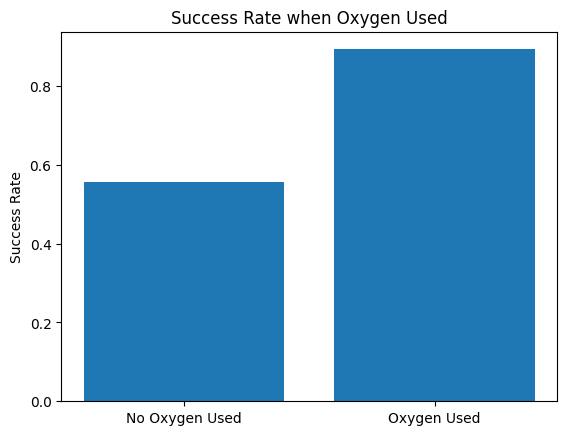

In [331]:
plt.bar(['No Oxygen Used', 'Oxygen Used'], oxygen_success['SUCCESS'])
plt.ylabel('Success Rate')
plt.title('Success Rate when Oxygen Used')